In [1]:
#!pip install simpy

  Using cached simpy-4.1.1-py3-none-any.whl.metadata (6.1 kB)
Using cached simpy-4.1.1-py3-none-any.whl (27 kB)


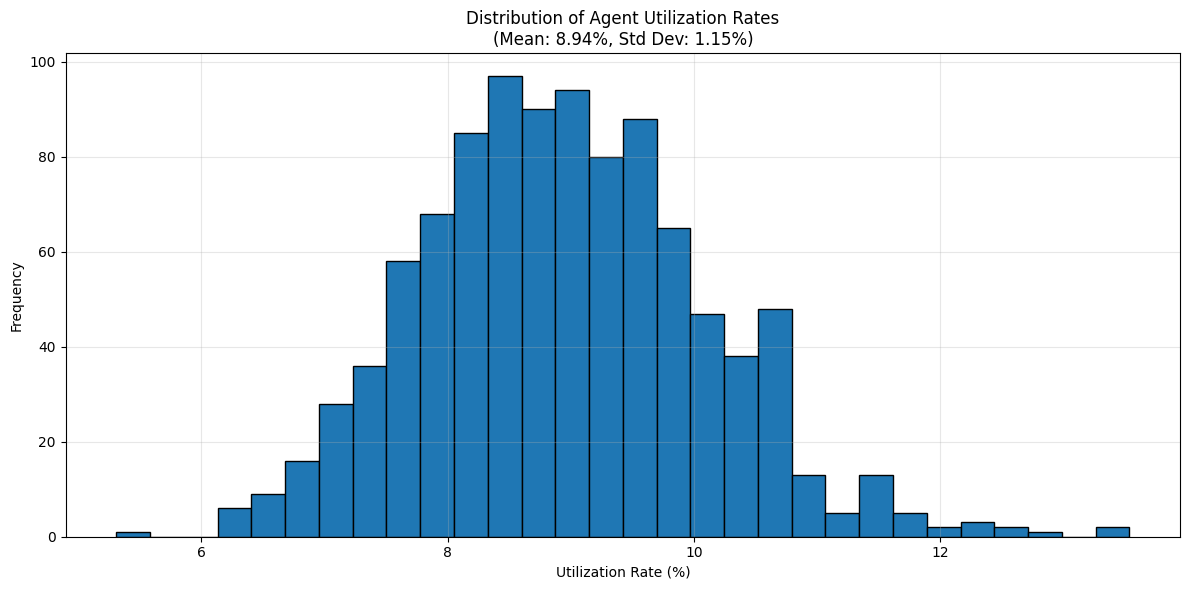

Average utilization rate: 8.94%
Standard deviation of utilization rate: 1.15%
Minimum utilization rate: 5.31%
Maximum utilization rate: 13.53%


In [4]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
SIM_TIME = 24 * 60  # 24 hours in minutes
NUM_AGENTS = 4
NUM_SHIFTS = 4
CALLS_PER_DAY = 130
AVG_CALL_DURATION = 4  # minutes
NUM_SIMULATIONS = 1000

# Calculate inter-arrival time
INTER_ARRIVAL_TIME = SIM_TIME / CALLS_PER_DAY

def contact_center(env, num_agents):
    agents = simpy.Resource(env, capacity=num_agents)
    while True:
        yield env.timeout(random.expovariate(1.0 / INTER_ARRIVAL_TIME))
        env.process(handle_call(env, agents))

def handle_call(env, agents):
    arrival_time = env.now
    with agents.request() as request:
        yield request
        wait_time = env.now - arrival_time
        call_duration = random.expovariate(1.0 / AVG_CALL_DURATION)
        yield env.timeout(call_duration)
        handle_time = env.now - arrival_time
        call_data.append((wait_time, call_duration, handle_time))

# Run multiple simulations
utilization_rates = []

for _ in range(NUM_SIMULATIONS):
    env = simpy.Environment()
    call_data = []
    env.process(contact_center(env, NUM_AGENTS))
    env.run(until=SIM_TIME)
    
    # Calculate overall utilization
    _, call_durations, _ = zip(*call_data)
    utilization_rate = sum(call_durations) / (SIM_TIME * NUM_AGENTS) * 100
    utilization_rates.append(utilization_rate)

# Calculate average utilization and standard deviation
avg_utilization = np.mean(utilization_rates)
std_utilization = np.std(utilization_rates)

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(utilization_rates, bins=30, edgecolor='black')
plt.title(f'Distribution of Agent Utilization Rates\n(Mean: {avg_utilization:.2f}%, Std Dev: {std_utilization:.2f}%)')
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Average utilization rate: {avg_utilization:.2f}%")
print(f"Standard deviation of utilization rate: {std_utilization:.2f}%")
print(f"Minimum utilization rate: {min(utilization_rates):.2f}%")
print(f"Maximum utilization rate: {max(utilization_rates):.2f}%")